# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Nisrina Ristyawati
- **Email:** m008d4kx2063@bangkit.academy
- **ID Dicoding:** M008D4KX2063

## Menentukan Pertanyaan Bisnis

- Question 1: What is the best bike rental season over the past 2 year?
- Question 2: How has the increase of registered users in the system over the past 2 years?

## Import Semua Packages/Library yang Digunakan

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Wrangling

### Gathering Data

In [65]:
# create day.csv as dataframe
url = "https://raw.githubusercontent.com/nisrina-ris/proyek_analisis_data/main/data/day.csv"
day_df = pd.read_csv(url, index_col=0)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# # create day.csv as dataframe
# day_df = pd.read_csv("/content/drive/MyDrive/proyek_analisis_data/Bike-sharing-dataset/day.csv")
# day_df.head()

### Assessing Data

In [66]:
day_df.info()

# check info (datatype, missing value, etc) about this dataframe
# no missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [67]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

# no duplicated data

Jumlah duplikasi:  0


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Cleaning data from dataframe day_df, changing data type from 'object' to 'datetime' for "dteday" variable in both dataframe

In [68]:
#changing data type of 'dteday' from object to datetime

datetime_column = ["dteday"]

for column in datetime_column:
  day_df[column] = pd.to_datetime(day_df[column])

In [69]:
#checking dataframe again after changing the data type of 'dteday'

day_df.info()

#already changed to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [70]:
#get statistical summary of day_df dataframe

day_df.describe(include="all", datetime_is_numeric=True)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Based on the summary of statistical parameters above, the number of users (casual and registered) at the initial launch of the bike-sharing system reached 22 users. The highest number of users was 8714 users (casual and registered). The average user uses the bike-sharing system in the fall. This can be used as a reference to ensure that the analysis system we create matches the data we have.

#### Create new dataframe: byseason

In [71]:
#grouping count by it's season
byseason = day_df.groupby(['season'])['cnt'].sum().reset_index()
print(byseason)

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


In [74]:
byseason.describe(include="all")

,season,cnt
count,4.000000,4.000000e+00
mean,2.500000,8.231698e+05
std,1.290994,2.515606e+05
min,1.000000,4.713480e+05
25%,1.750000,7.490468e+05
50%,2.500000,8.801010e+05
75%,3.250000,9.542240e+05
max,4.000000,1.061129e+06


In [73]:
print("Jumlah duplikasi: ", byseason.duplicated().sum())
byseason.describe(include="all")

Jumlah duplikasi:  0


,season,cnt
count,4.000000,4.000000e+00
mean,2.500000,8.231698e+05
std,1.290994,2.515606e+05
min,1.000000,4.713480e+05
25%,1.750000,7.490468e+05
50%,2.500000,8.801010e+05
75%,3.250000,9.542240e+05
max,4.000000,1.061129e+06


In [81]:
#save dataframe byseason
byseason.to_csv("byseason.csv", index=False)

#### Create new dataframe: byregistered

In [77]:
#grouping date by users (casual and registered) at that day
byregistered = day_df.groupby(['dteday'])[['casual','registered','cnt']].sum().reset_index()
print(byregistered)

        dteday  casual  registered   cnt
0   2011-01-01     331         654   985
1   2011-01-02     131         670   801
2   2011-01-03     120        1229  1349
3   2011-01-04     108        1454  1562
4   2011-01-05      82        1518  1600
..         ...     ...         ...   ...
726 2012-12-27     247        1867  2114
727 2012-12-28     644        2451  3095
728 2012-12-29     159        1182  1341
729 2012-12-30     364        1432  1796
730 2012-12-31     439        2290  2729

[731 rows x 4 columns]


In [78]:
# Extract year and month
byregistered['year'] = byregistered['dteday'].dt.year
byregistered['month'] = byregistered['dteday'].dt.month

# Group by year and month to get info the sum of casual and registered user
monthly_data = byregistered.groupby(['year', 'month']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

print(monthly_data)

    year  month  casual  registered     cnt
0   2011      1    3073       35116   38189
1   2011      2    6242       41973   48215
2   2011      3   12826       51219   64045
3   2011      4   22346       72524   94870
4   2011      5   31050      104771  135821
5   2011      6   30612      112900  143512
6   2011      7   36452      104889  141341
7   2011      8   28842      107849  136691
8   2011      9   26545      100873  127418
9   2011     10   25222       98289  123511
10  2011     11   15594       86573  102167
11  2011     12    8448       78875   87323
12  2012      1    8969       87775   96744
13  2012      2    8721       94416  103137
14  2012      3   31618      133257  164875
15  2012      4   38456      135768  174224
16  2012      5   44235      151630  195865
17  2012      6   43294      159536  202830
18  2012      7   41705      161902  203607
19  2012      8   43197      171306  214503
20  2012      9   43778      174795  218573
21  2012     10   34538      164

In [79]:
monthly_data.describe(include="all")

,year,month,casual,registered,cnt
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2011.500000,6.500000,25834.041667,111360.916667,137194.958333
std,0.510754,3.526299,13528.543135,40136.833621,52267.138331
min,2011.000000,1.000000,3073.000000,35116.000000,38189.000000
25%,2011.000000,3.750000,13140.250000,87474.500000,100811.250000
50%,2011.500000,6.500000,27693.500000,106369.000000,136256.000000
75%,2012.000000,9.250000,36953.000000,139733.500000,179634.250000
max,2012.000000,12.000000,44235.000000,174795.000000,218573.000000


In [80]:
print("Jumlah duplikasi: ", monthly_data.duplicated().sum())
monthly_data.describe()

Jumlah duplikasi:  0


,year,month,casual,registered,cnt
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2011.500000,6.500000,25834.041667,111360.916667,137194.958333
std,0.510754,3.526299,13528.543135,40136.833621,52267.138331
min,2011.000000,1.000000,3073.000000,35116.000000,38189.000000
25%,2011.000000,3.750000,13140.250000,87474.500000,100811.250000
50%,2011.500000,6.500000,27693.500000,106369.000000,136256.000000
75%,2012.000000,9.250000,36953.000000,139733.500000,179634.250000
max,2012.000000,12.000000,44235.000000,174795.000000,218573.000000


In [82]:
#save dataframe monthly_data
monthly_data.to_csv("monthly_data.csv", index=False)

## Visualization & Explanatory Analysis

#### Question 1 : What is the best bike rental season over the past 2 year?

In [83]:
# replace season values
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
byseason['season'] = byseason['season'].map(season_dict)

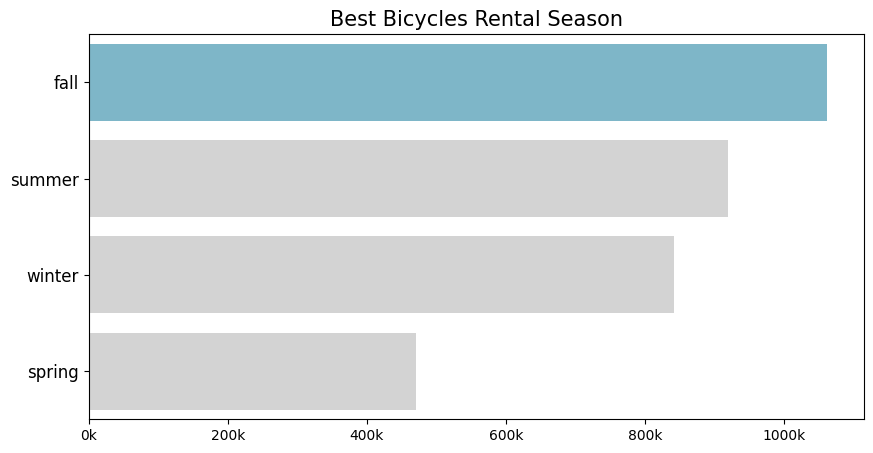

In [84]:
# divided by 1000 to replace with unit 'k'
byseason = byseason.assign(cnt_k=lambda x: x['cnt'] / 1000)

plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt_k", y="season", data=byseason.sort_values(by='cnt', ascending=False), hue='season', palette=colors, legend=False)

plt.ylabel(None)
plt.xlabel(None)
plt.title("Best Bicycles Rental Season", loc="center", fontsize=15)
plt.tick_params(axis ='y', labelsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}k'.format(x)))

plt.show()

#### Question 2 : How has the increase of registered users in the system over the past 2 years?

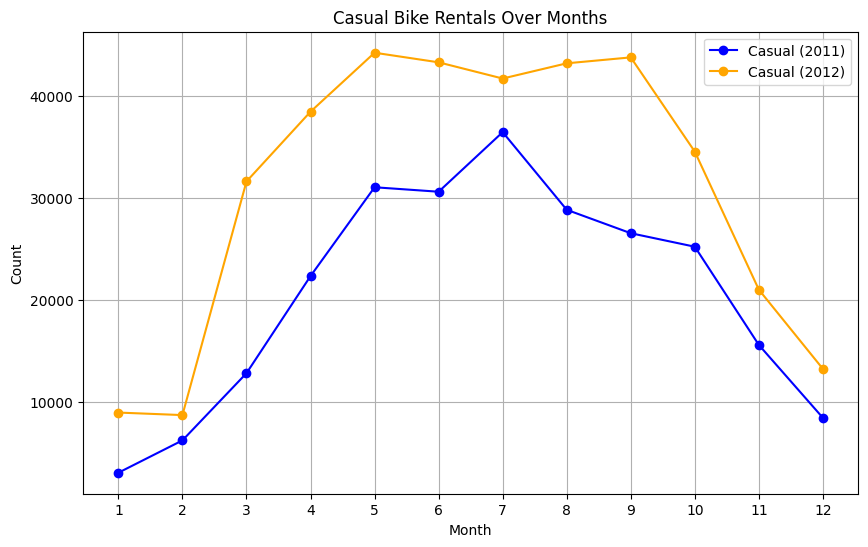

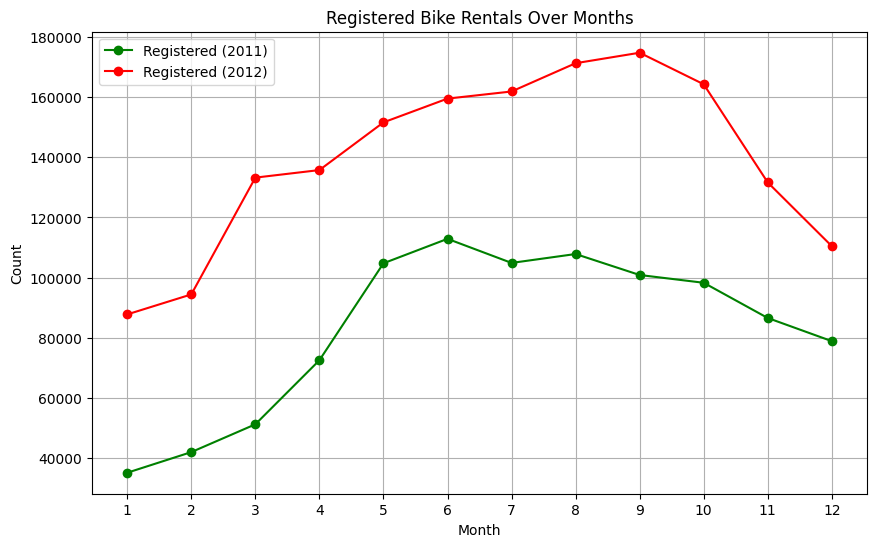

In [85]:
# Filter data for 2011 and 2012
monthly_data_2011 = monthly_data[monthly_data['year'] == 2011]
monthly_data_2012 = monthly_data[monthly_data['year'] == 2012]

# Plot Casual rentals for 2011 and 2012
plt.figure(figsize=(10, 6))

# Plot casual rentals for 2011
plt.plot(monthly_data_2011['month'], monthly_data_2011['casual'], marker='o', label='Casual (2011)', color='blue')

# Plot casual rentals for 2012
plt.plot(monthly_data_2012['month'], monthly_data_2012['casual'], marker='o', label='Casual (2012)', color='orange')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Casual Bike Rentals Over Months')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

# Plot Registered rentals for 2011 and 2012
plt.figure(figsize=(10, 6))

# Plot registered rentals for 2011
plt.plot(monthly_data_2011['month'], monthly_data_2011['registered'], marker='o', label='Registered (2011)', color='green')

# Plot registered rentals for 2012
plt.plot(monthly_data_2012['month'], monthly_data_2012['registered'], marker='o', label='Registered (2012)', color='red')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Registered Bike Rentals Over Months')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

## Conclusion

**Conclusion question 1** : From the visualization above, we can see that fall is the season with the highest number of bike rentals in the last two years. While spring is the season with the lowest number of bike rentals.

**Conclution pertanyaan 2** : From the visualization above, we can see that there is an increase in the number of casual users of the bike sharing system from 2011 to 2012. In that year, the number of users registered with the system also increased.